# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2381 Ивашинников Леонид Дмитриевич и Двиков Даниил Владиславович. Вариант №7.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).


## Основные теоретические положения


### Дискретизация сигнала

Исходный непрерывный сигнал задаётся суммой гармоник:

$$
x(t) = \sum_{k=1}^{11} A_k \cos(\omega_k t + \varphi_k)
$$

где частоты $\omega_k$ упорядочены по возрастанию с шагом $\Delta\omega = 0.1\pi$, амплитуды $A_k$ — целые числа от 1 до 11, фазы $\varphi_k$ — случайные величины из интервала $[0, 0.5]$.

Дискретизация выполняется с шагом $T = 1$, формируя последовательность из $N = 32$ отсчётов.

### Исследуемые фильтры

В данной работе анализируются рекурсивные фильтры на основе численных методов дифференцирования и интегрирования.

### Линейные фильтры скользящего среднего

Сглаживание выполняется нерекурсивным фильтром:

$$
y_n=\sum_{k=-h}^{h} c_k x_{n+k}, \qquad c_k=\frac{1}{2h+1}
$$

Передаточная функция для сглаживания по (2h+1) точкам:

$$
\tilde{H}_{2h+1}(f)=
\frac{1}{2h+1}
\cdot
\frac{\sin\left(2\pi f\left(h+\frac12\right)\right)}{\sin(\pi f)}.
$$

#### Дискретный фильтр с линейным сглаживанием по 5 точкам

$$
y(n) = \frac{1}{5} \sum_{k=n-2}^{n+2} x_k
$$

Передаточная функция:

$$
H(\omega) = \frac{1}{5} \left(1 + 2\cos(\omega) + 2\cos(2\omega)\right)
$$

#### Дискретный фильтр с линейным сглаживание по 9 точкам

$$
y(n) = \frac{1}{9} \sum_{k=n-4}^{n+4} x_k
$$

Передаточная функция:

$$
H(\omega) = \frac{1}{9} \left(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega)\right)
$$

#### Дифференцирующий фильтр соответствующий численному дифференцированию 1-го порядка.

$$
y(n) = \frac{s_{n+1} - s_{n-1}}{2}
$$

Передаточная функция:

$$
H(\omega) = i\sin(\omega)
$$

#### Интегрирующий фильтр (метод прямоугольников)

$$
y_{n+1} = y_n + s_{n+0.5}
$$

Передаточная функция:

$$
H(\omega) = \frac{1}{2i \cdot \sin(\omega/2)}
$$

#### Интегрирующий фильтр (метод трапеций)

$$
y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})
$$

Передаточная функция:

$$
H(\omega) = \frac{\cos(\omega/2)}{2i \cdot \sin(\omega/2)}
$$

#### Интегрирующий фильтр (метод Симпсона)

$$
y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})
$$

Передаточная функция:

$$
H(\omega) = \frac{2 + \cos(\omega)}{3i \cdot \sin(\omega)}
$$

### Спектральный анализ

Для исследования частотных свойств сигналов применяется дискретное преобразование Фурье:

$$
X(n) = \sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}
$$


## Выполнение работы



In [208]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### Задание 1.

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

In [209]:
# Параметры
T = 1                   # Шаг дискретизации
N = 32                  # Количество отсчётов
num_harmonics = 11 
# Частоты
omega = np.array([k * 0.1 * np.pi for k in range(num_harmonics)])

# Амплитуды
A = np.random.randint(1, 12, size=num_harmonics)
A_norm = A / np.sum(A)

# Фазы: случайные от 0 до 0.5
phi = np.random.uniform(0, 0.5, size=num_harmonics)

# Функция сигнала
def signal(t):
    s = np.zeros_like(t, dtype=float)
    for k in range(num_harmonics):
        s += A_norm[k] * np.cos(omega[k] * t + phi[k])
    return s

# Аналоговый сигнал
t_analog = np.linspace(0, N-1, 1000)
x_analog = signal(t_analog)

# Дискретный сигнал
n = np.arange(N)
t_discrete = n * T
x_discrete = signal(t_discrete)

### Задание 2.


Визуализация исходного аналогового и дискретизированного сигналов

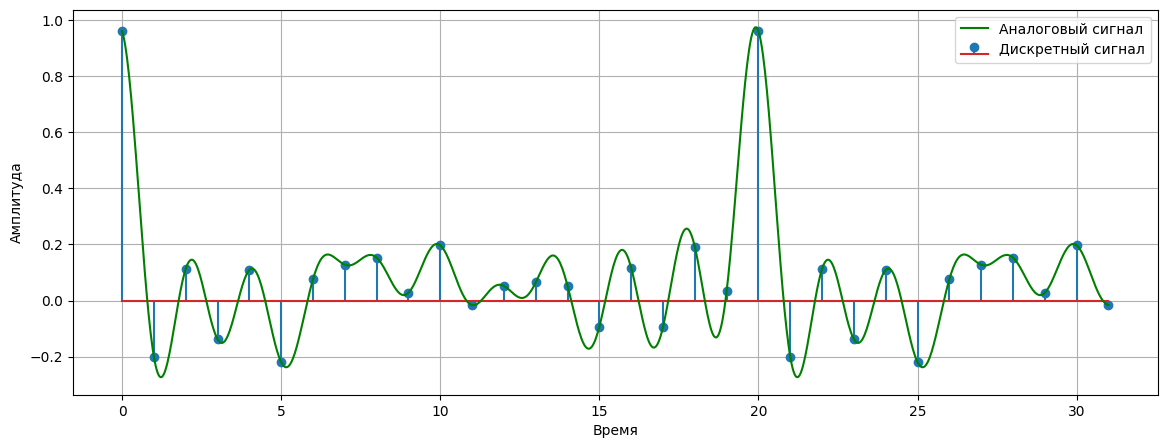

In [210]:
plt.figure(figsize=(14, 5))
plt.stem(t_discrete, x_discrete, label='Дискретный сигнал')
plt.plot(t_analog, x_analog, label='Аналоговый сигнал', color='g')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

### Задание 3.


С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

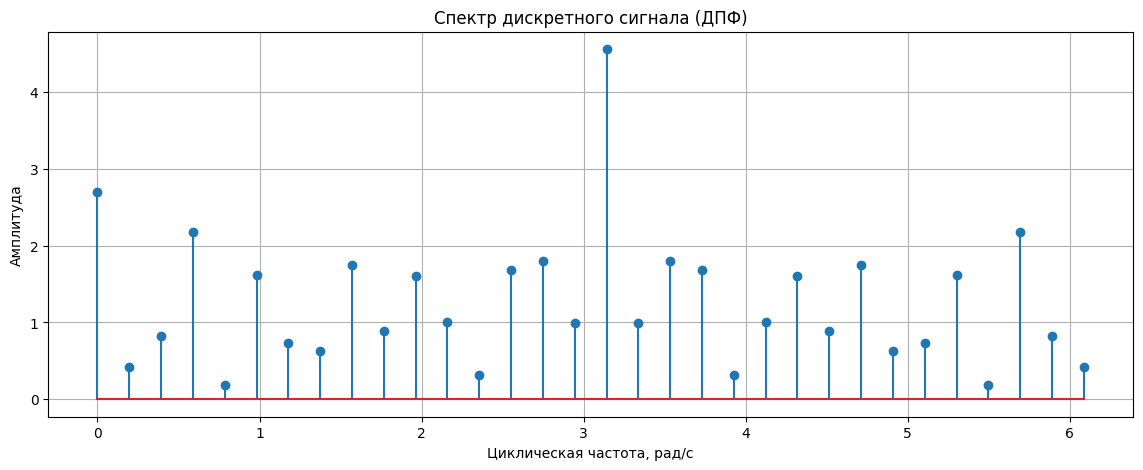

In [211]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X

X = dft(x_discrete)

amplitude_spectrum = np.abs(X)

plt.figure(figsize=(14, 5))
freq_axis = 2 * np.pi * np.arange(N) / N
plt.stem(freq_axis, amplitude_spectrum)
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Спектр дискретного сигнала (ДПФ)')
plt.grid(True)
plt.show()

### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.


Линейное сглаживание по 5 точкам

$$
y(n) = \frac{1}{5} \sum_{k=n-2}^{n+2} x_k
$$

Передаточная функция:

$$
H(\omega) = \frac{1}{5} \left(1 + 2\cos(\omega) + 2\cos(2\omega)\right)
$$

Линейное сглаживание по 9 точкам

$$
y(n) = \frac{1}{9} \sum_{k=n-4}^{n+4} x_k
$$

Передаточная функция:

$$
H(\omega) = \frac{1}{9} \left(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega)\right)
$$

In [212]:
def smooth(x, M):
    N = len(x)
    y = np.zeros(N)
    half = M // 2
    for n in range(N):
        s = 0
        for k in range(-half, half + 1):
            idx = (n + k) % N
            s += x[idx]
        y[n] = s / M
    return y

# Применяем сглаживание
y5 = smooth(x_discrete, 5)
y9 = smooth(x_discrete, 9)

### Задание 5.

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

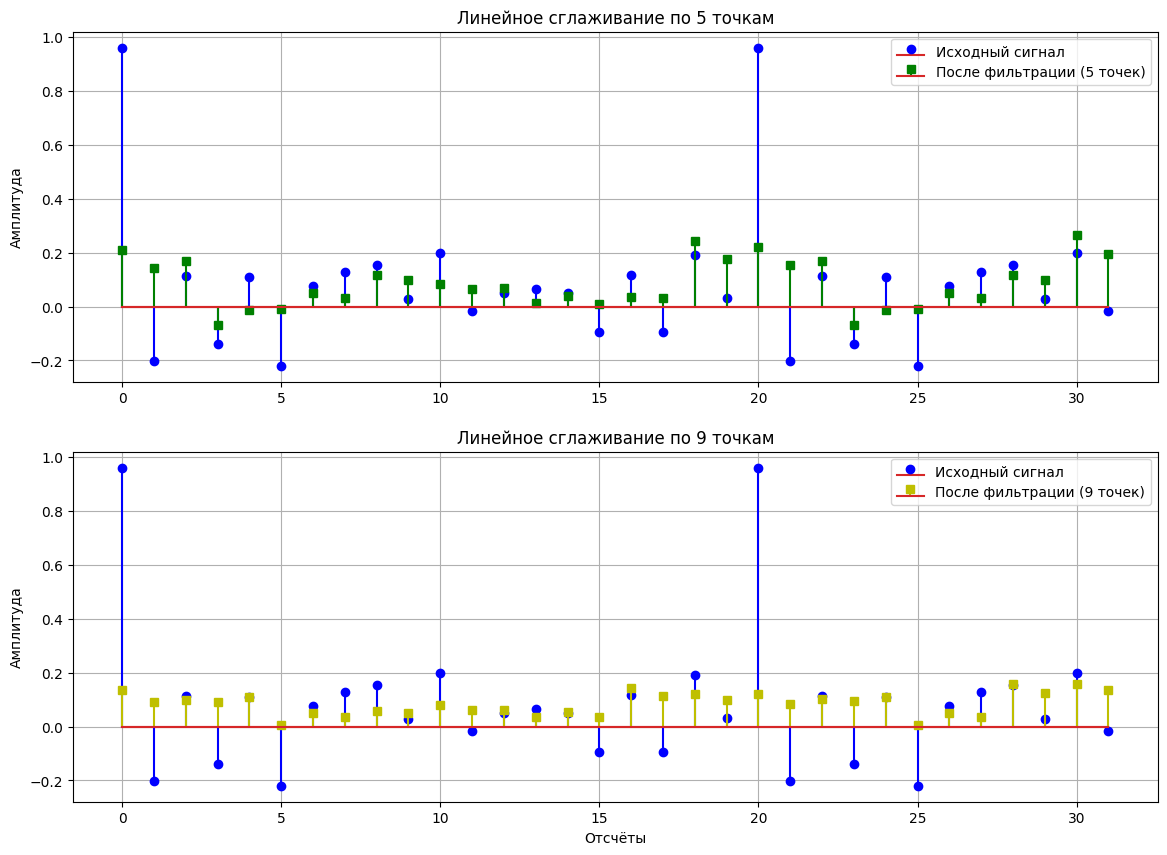

In [213]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].stem(t_discrete, x_discrete, label='Исходный сигнал', linefmt='b-', markerfmt='bo')
axes[0].stem(t_discrete, y5, label='После фильтрации (5 точек)', linefmt='g-', markerfmt='s')
axes[0].set_ylabel('Амплитуда')
axes[0].set_title('Линейное сглаживание по 5 точкам')
axes[0].legend()
axes[0].grid(True)

axes[1].stem(t_discrete, x_discrete, label='Исходный сигнал', linefmt='b-', markerfmt='bo')
axes[1].stem(t_discrete, y9, label='После фильтрации (9 точек)', linefmt='y-', markerfmt='s')
axes[1].set_xlabel('Отсчёты')
axes[1].set_ylabel('Амплитуда')
axes[1].set_title('Линейное сглаживание по 9 точкам')
axes[1].legend()
axes[1].grid(True)


### Задание 6.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

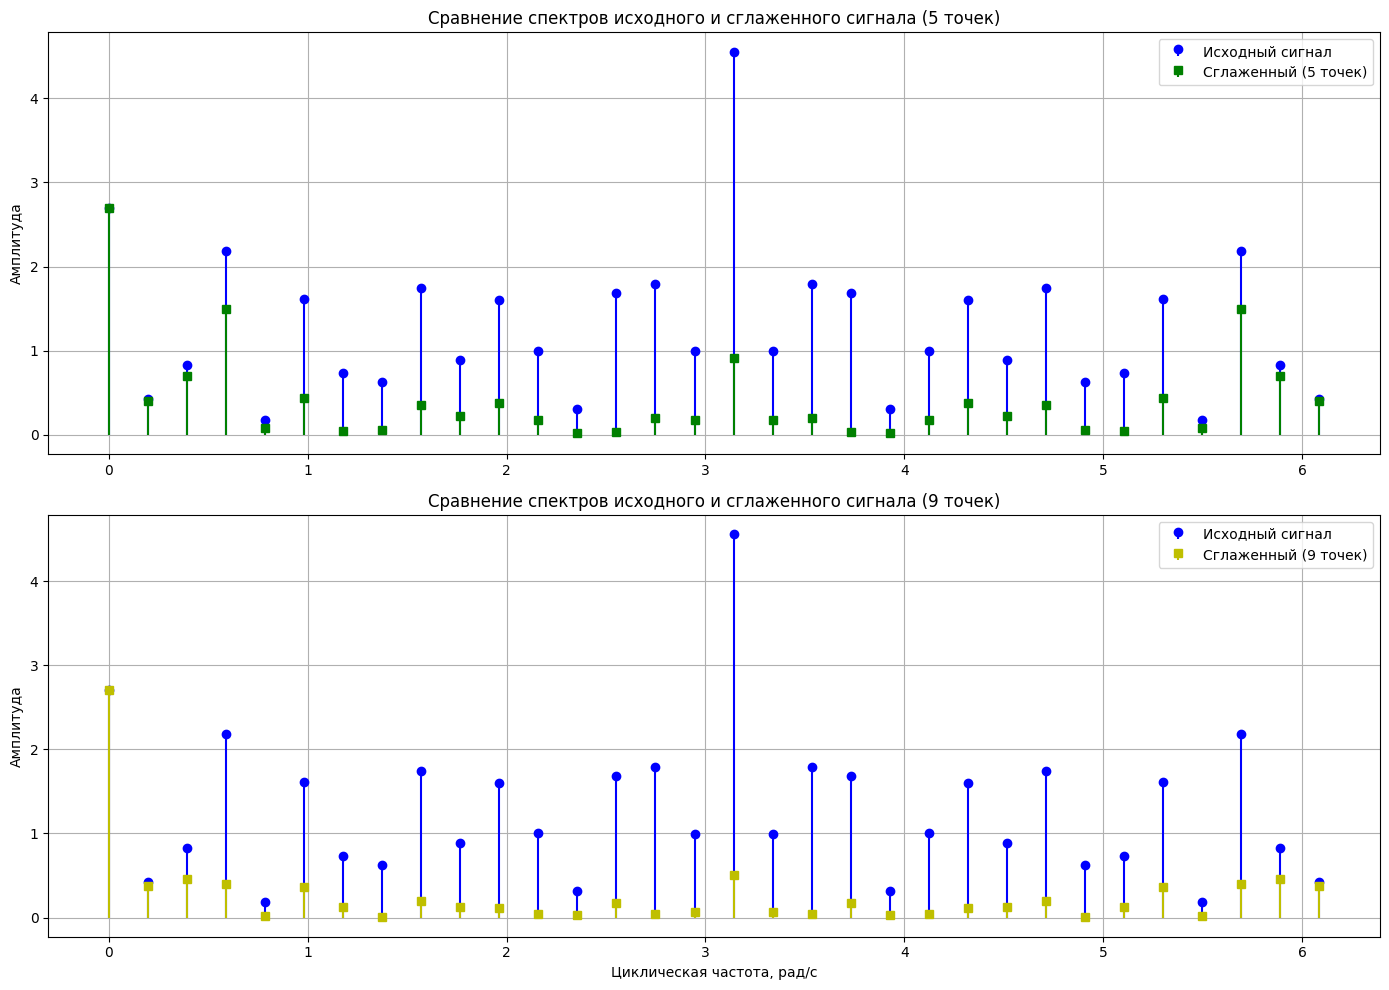

In [214]:
X5 = dft(y5)
X9 = dft(y9)

amp_original = np.abs(X)
amp_5 = np.abs(X5)
amp_9 = np.abs(X9)


fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Сравнение спектра исходного и сглаженного по 5 точкам
axes[0].stem(freq_axis, amp_original, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
axes[0].stem(freq_axis, amp_5, linefmt='g-', markerfmt='s', basefmt=' ', label='Сглаженный (5 точек)')
axes[0].set_ylabel('Амплитуда')
axes[0].set_title('Сравнение спектров исходного и сглаженного сигнала (5 точек)')
axes[0].legend()
axes[0].grid(True)

# Сравнение спектра исходного и сглаженного по 9 точкам
axes[1].stem(freq_axis, amp_original, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
axes[1].stem(freq_axis, amp_9, linefmt='y-', markerfmt='s', basefmt=' ', label='Сглаженный (9 точек)')
axes[1].set_xlabel('Циклическая частота, рад/с')
axes[1].set_ylabel('Амплитуда')
axes[1].set_title('Сравнение спектров исходного и сглаженного сигнала (9 точек)')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

### Задание 7.

Проанализировать результат на соответствие значениям $H(ω)$. Сделать выводы.


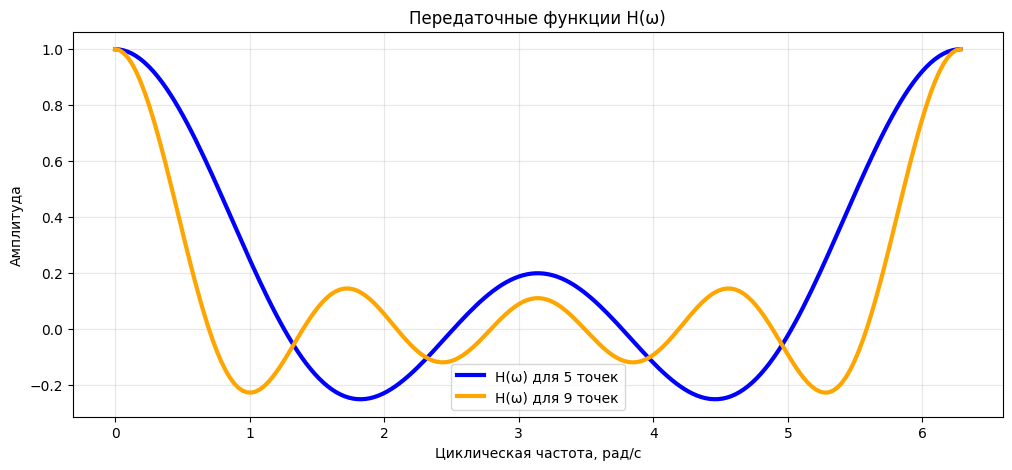

In [215]:
def H5(omega):
    return (1/5) * (1 + 2*np.cos(omega) + 2*np.cos(2*omega))

def H9(omega):
    return (1/9) * (1 + 2*np.cos(omega) + 2*np.cos(2*omega) + 
                    2*np.cos(3*omega) + 2*np.cos(4*omega))

omega = np.linspace(0, 2*np.pi, 200)

plt.figure(figsize=(12, 5))
plt.plot(omega, H5(omega), 'b-', linewidth=3, label='H(ω) для 5 точек')
plt.plot(omega, H9(omega), 'orange', linewidth=3, label='H(ω) для 9 точек')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Передаточные функции H(ω)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Фильтры сглаживания по скользящему среднему работают как низкочастотные фильтры. Это подтверждается совпадением теоретических передаточных функций H(ω) с результатами обработки спектров.

**5-точечный фильтр**: выполняет мягкое сглаживание, при этом основные особенности сигнала остаются различимыми

**9-точечный фильтр**: значительно ослабляет высокочастотные компоненты и даёт более гладкий результат, однако мелкие детали сигнала при этом утрачиваются

Анализ спектров показывает: амплитуды высших гармоник после 9-точечного фильтра снижаются заметно сильнее, чем после 5-точечного. Это согласуется с теорией — расширение окна усреднения сужает частотную полосу пропускания и усиливает фильтрацию на высоких частотах.

**Итог:** с ростом числа точек в окне фильтра сглаживающий эффект возрастает, но детализация сигнала снижается. Выбор оптимального размера окна определяется компромиссом между степенью сглаживания и сохранением полезной информации.

### Задание 8

Повторить п. 4–7 для следующих фильтров:

- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

In [216]:
def diff_filter(x):
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        y[n] = x[n] - x[(n-1) % N]
    return y

y_diff = diff_filter(x_discrete)


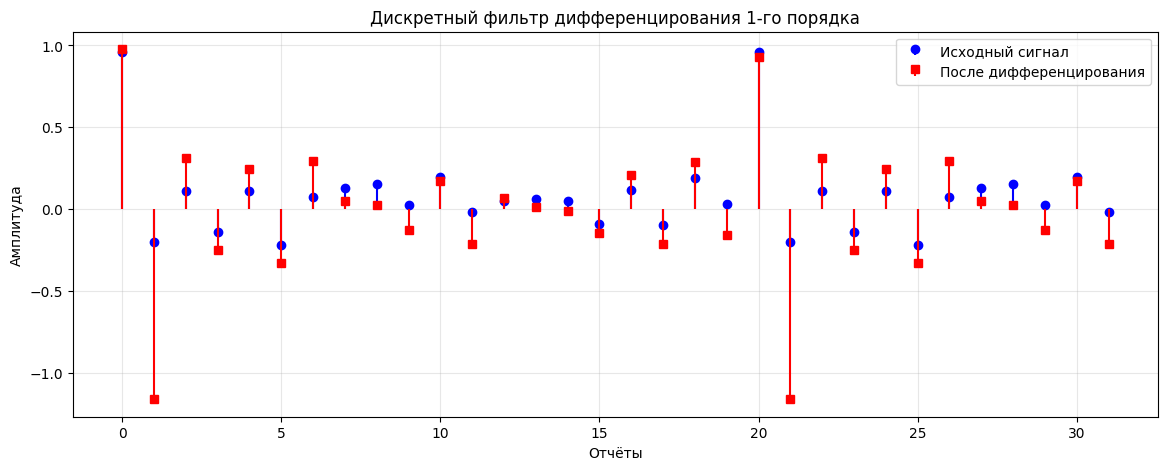

In [217]:
plt.figure(figsize=(14, 5))
plt.stem(t_discrete, x_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t_discrete, y_diff, linefmt='r-', markerfmt='s', basefmt=' ', label='После дифференцирования')
plt.xlabel('Отчёты')
plt.ylabel('Амплитуда')
plt.title('Дискретный фильтр дифференцирования 1-го порядка')
plt.legend()
plt.grid(True, alpha=0.3)

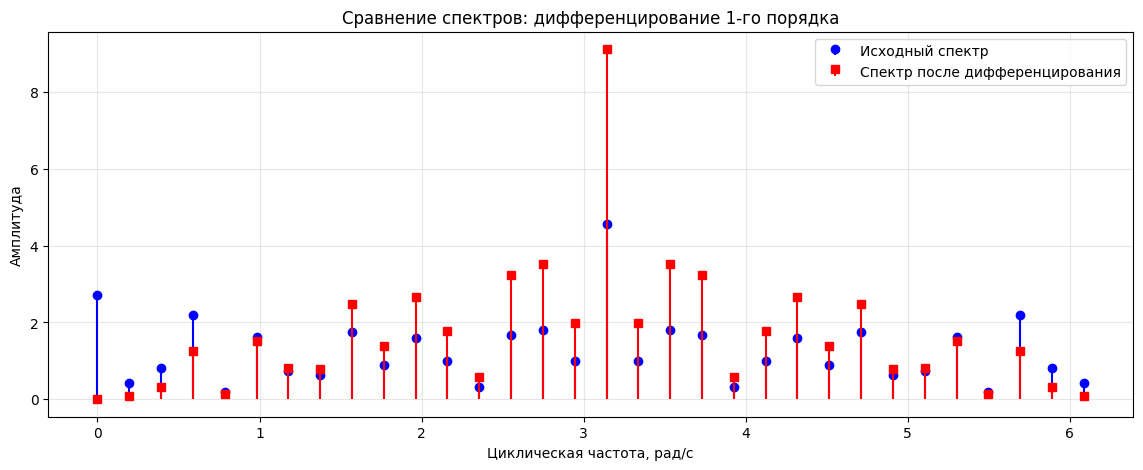

In [218]:
X_diff = dft(y_diff)
amp_diff = np.abs(X_diff)
plt.figure(figsize=(14, 5))
plt.stem(freq_axis, amp_original, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, amp_diff, linefmt='r-', markerfmt='s', basefmt=' ', label='Спектр после дифференцирования')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: дифференцирование 1-го порядка')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [219]:
omega_plot = np.linspace(0, 2*np.pi, 200)
H_diff = np.sin(omega_plot)

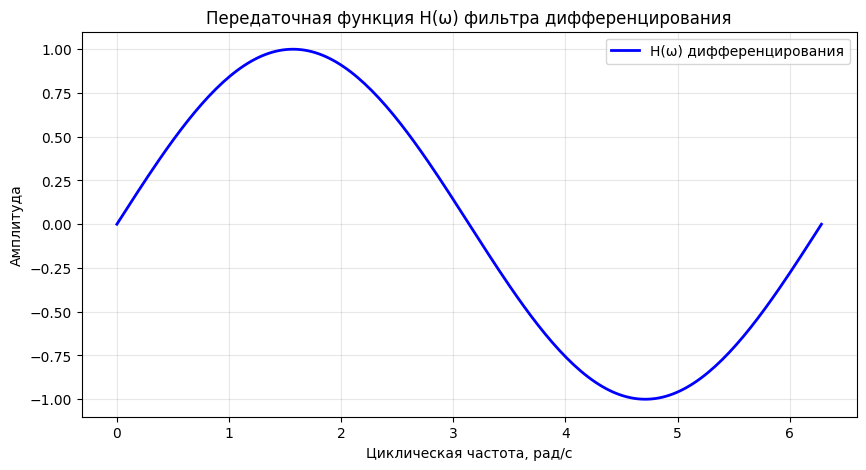

In [220]:
plt.figure(figsize=(10, 5))
plt.plot(omega_plot, H_diff, 'b-', linewidth=2, label='H(ω) дифференцирования')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Передаточная функция H(ω) фильтра дифференцирования')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Дискретный фильтр численного дифференцирования 1-го порядка имеет теоретическую передаточную функцию **$H(\omega) = i \sin(\omega)$**.

- **Низкие частоты (ω $\Rightarrow$ 0):** H(ω) ≈ 0 — низкочастотные составляющие и постоянная компонента полностью подавляются

- **Средние частоты (ω ≈ π/2):** |H(ω)| = 1 — максимальный коэффициент передачи, эти частоты проходят без ослабления

- **Высокие частоты (ω $\Rightarrow$ π):** H(ω) $\Rightarrow$ 0 — высокочастотные составляющие также подавляются



#### Интегрирующий фильтр (метод прямоугольников)

$$
y_{n+1} = y_n + s_{n+0.5}
$$

Передаточная функция:

$$
H(\omega) = \frac{1}{2i \cdot \sin(\omega/2)}
$$

#### Интегрирующий фильтр (метод трапеций)

$$
y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})
$$

Передаточная функция:

$$
H(\omega) = \frac{\cos(\omega/2)}{2i \cdot \sin(\omega/2)}
$$

#### Интегрирующий фильтр (метод Симпсона)

$$
y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})
$$

Передаточная функция:

$$
H(\omega) = \frac{2 + \cos(\omega)}{3i \cdot \sin(\omega)}
$$

In [221]:
def integ_rect(x):
    N = len(x)
    y = np.zeros(N)
    y[0] = x[0]
    for n in range(1, N):
        y[n] = y[n-1] + x[n]
    return y

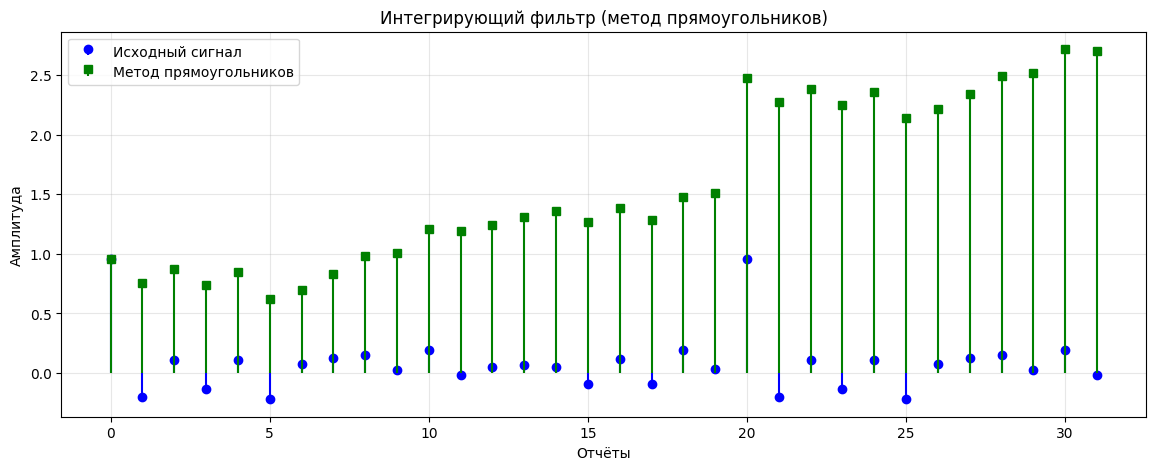

In [222]:
y_rect = integ_rect(x_discrete)

plt.figure(figsize=(14, 5))
plt.stem(t_discrete, x_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t_discrete, y_rect, linefmt='g-', markerfmt='s', basefmt=' ', label='Метод прямоугольников')
plt.xlabel('Отчёты')
plt.ylabel('Амплитуда')
plt.title('Интегрирующий фильтр (метод прямоугольников)')
plt.legend()
plt.grid(True, alpha=0.3)

In [223]:
def integ_trap(x):
    N = len(x)
    y = np.zeros(N)
    y[0] = x[0] / 2
    for n in range(1, N):
        y[n] = y[n-1] + (x[n-1] + x[n]) / 2
    return y

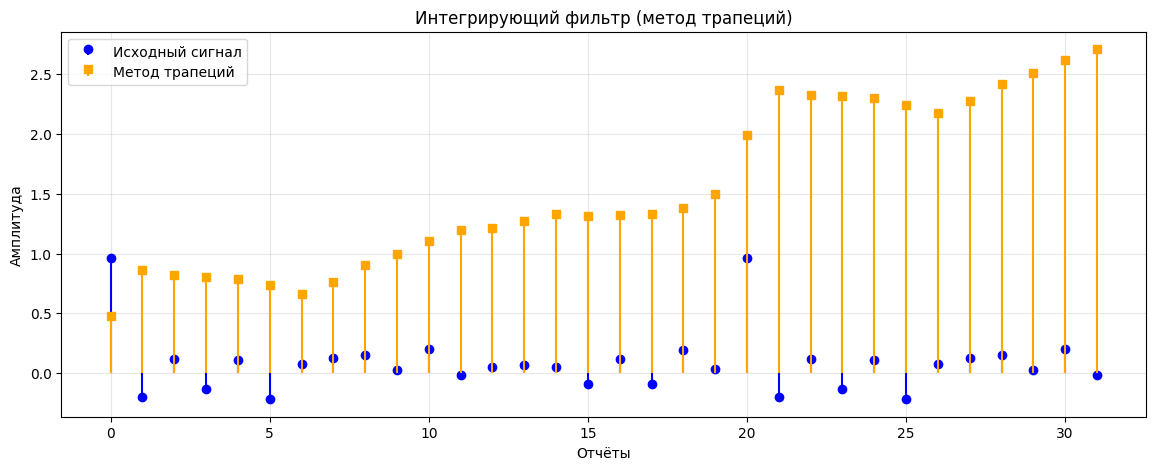

In [224]:
y_trap = integ_trap(x_discrete)

plt.figure(figsize=(14, 5))
plt.stem(t_discrete, x_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t_discrete, y_trap, linefmt='orange', markerfmt='s', basefmt=' ', label='Метод трапеций')
plt.xlabel('Отчёты')
plt.ylabel('Амплитуда')
plt.title('Интегрирующий фильтр (метод трапеций)')
plt.legend()
plt.grid(True, alpha=0.3)

In [225]:
def integ_simpson(x):
    N = len(x)
    y = np.zeros(N)
    y[0] = x[0] / 3
    y[1] = y[0] + (x[0] + 4*x[1]) / 3
    for n in range(2, N):
        y[n] = y[n-2] + (x[n-2] + 4*x[n-1] + x[n]) / 3
    return y

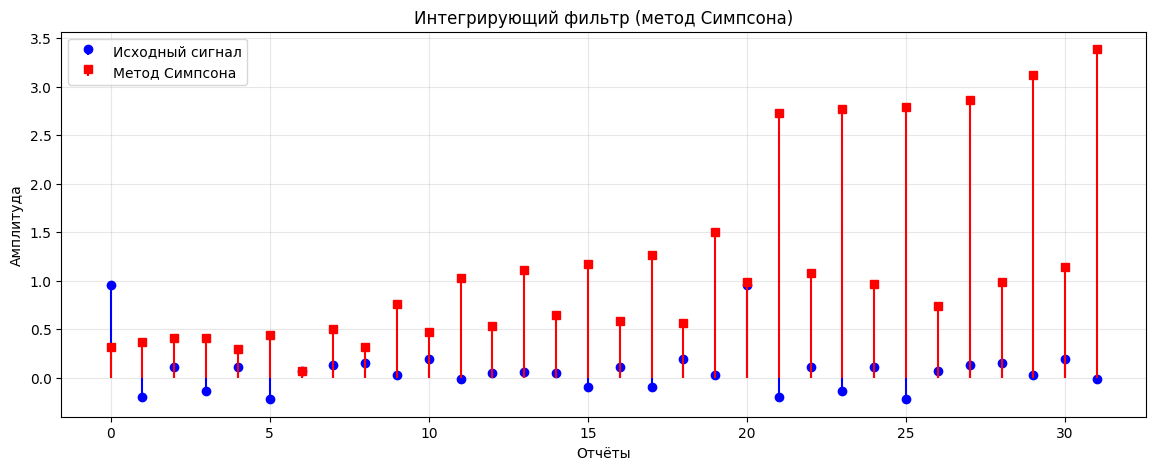

In [226]:
y_simp = integ_simpson(x_discrete)

plt.figure(figsize=(14, 5))
plt.stem(t_discrete, x_discrete, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
plt.stem(t_discrete, y_simp, linefmt='r-', markerfmt='s', basefmt=' ', label='Метод Симпсона')
plt.xlabel('Отчёты')
plt.ylabel('Амплитуда')
plt.title('Интегрирующий фильтр (метод Симпсона)')
plt.legend()
plt.grid(True, alpha=0.3)

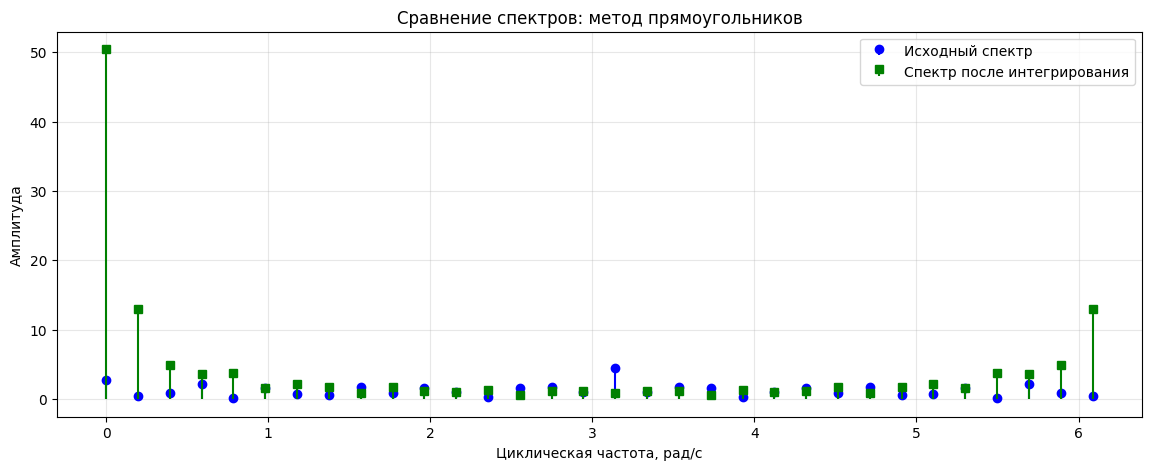

In [227]:
X_rect = dft(y_rect)
amp_rect = np.abs(X_rect)

plt.figure(figsize=(14, 5))
plt.stem(freq_axis, amp_original, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, amp_rect, linefmt='g-', markerfmt='s', basefmt=' ', label='Спектр после интегрирования')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: метод прямоугольников')
plt.legend()
plt.grid(True, alpha=0.3)

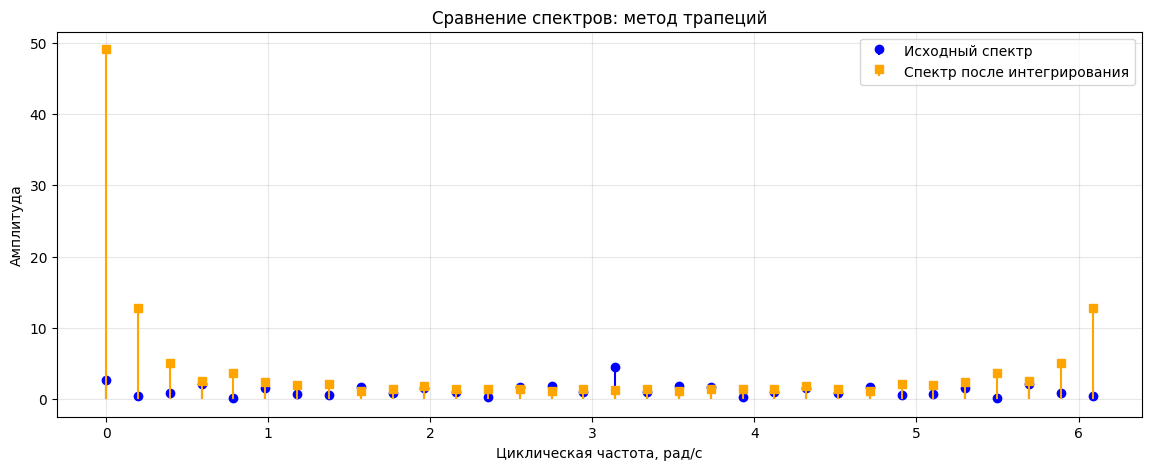

In [228]:
X_trap = dft(y_trap)
amp_trap = np.abs(X_trap)

plt.figure(figsize=(14, 5))
plt.stem(freq_axis, amp_original, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, amp_trap, linefmt='orange', markerfmt='s', basefmt=' ', label='Спектр после интегрирования')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: метод трапеций')
plt.legend()
plt.grid(True, alpha=0.3)

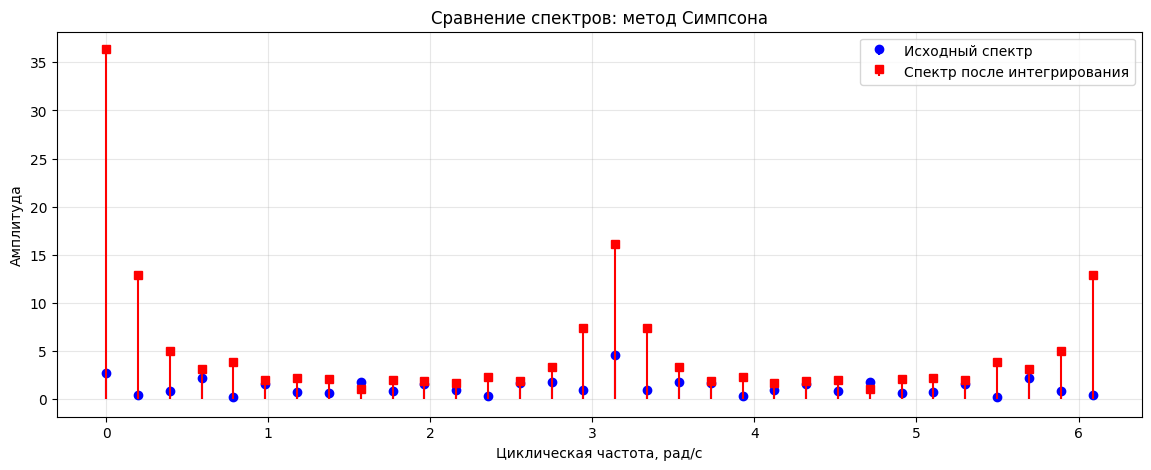

In [229]:
X_simp = dft(y_simp)
amp_simp = np.abs(X_simp)

plt.figure(figsize=(14, 5))
plt.stem(freq_axis, amp_original, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный спектр')
plt.stem(freq_axis, amp_simp, linefmt='r-', markerfmt='s', basefmt=' ', label='Спектр после интегрирования')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: метод Симпсона')
plt.legend()
plt.grid(True, alpha=0.3)

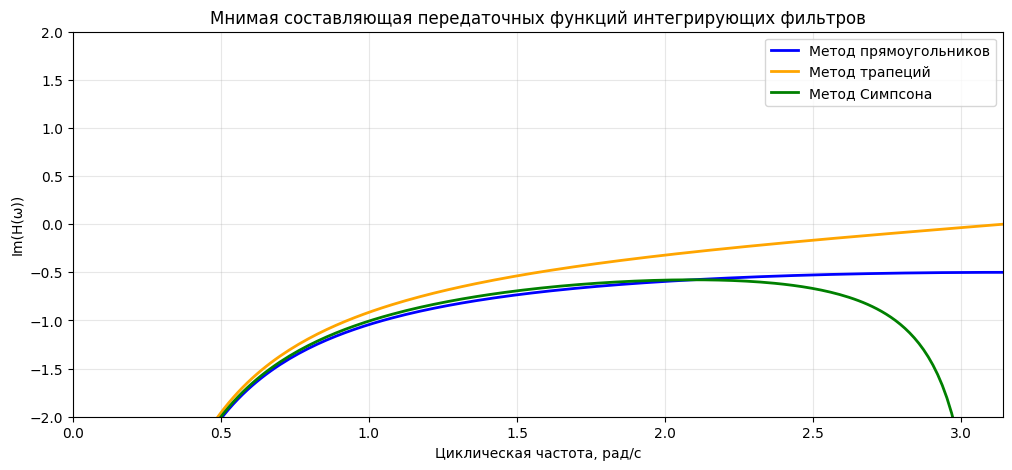

In [230]:
omega_plot = 2 * np.pi * np.linspace(0.001, 0.5, 200)

H_rect_im = np.imag(1 / (2j * np.sin(omega_plot / 2)))
H_trap_im = np.imag(np.cos(omega_plot / 2) / (2j * np.sin(omega_plot / 2)))
H_simp_im = np.imag((2 + np.cos(omega_plot)) / (3j * np.sin(omega_plot)))

# Убираем выбросы
H_rect_im[np.abs(H_rect_im) > 15] = np.nan
H_trap_im[np.abs(H_trap_im) > 15] = np.nan
H_simp_im[np.abs(H_simp_im) > 15] = np.nan

plt.figure(figsize=(12, 5))
plt.plot(omega_plot, H_rect_im, 'b-', linewidth=2, label='Метод прямоугольников')
plt.plot(omega_plot, H_trap_im, 'orange', linewidth=2, label='Метод трапеций')
plt.plot(omega_plot, H_simp_im, 'g-', linewidth=2, label='Метод Симпсона')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Im(H(ω))')
plt.title('Мнимая составляющая передаточных функций интегрирующих фильтров')
plt.xlim(0, np.pi)
plt.ylim(-2, 2)
plt.legend()
plt.grid(True, alpha=0.3)


- **Метод прямоугольников:** Im(H) стремится к -0.5 при ω $\Rightarrow$ π, наиболее стабильная характеристика на высоких частотах

- **Метод трапеций:** Im(H) $\Rightarrow$ 0 при ω $\Rightarrow$ π, обеспечивает полное подавление высокочастотных составляющих

- **Метод Симпсона:** Im(H) $\Rightarrow$ - $\infty$ при ω $\Rightarrow$ π из-за полюса в sin(ω), но на средних частотах близок к методу трапеций

На низких частотах (ω $\Rightarrow$ 0) все методы сходятся и стремятся к -$\infty$, что соответствует накоплению постоянной составляющей интегратором. Метод трапеций оптимален для подавления высокочастотных помех, а метод Симпсона обеспечивает наибольшую точность на средних частотах.

## Выводы

В ходе лабораторной работы исследованы рекурсивные фильтры, построенные на основе формул численного дифференцирования и интегрирования. Для анализа был сформирован тестовый дискретный сигнал из 11 косинусоидальных гармоник с частотами от 0 до π и случайными амплитудами и фазами.

Фильтры линейного сглаживания по 5 и 9 точкам показали себя как фильтры низких частот — они эффективно подавляют высокочастотные составляющие сигнала, сохраняя его медленно меняющуюся часть. При этом увеличение числа точек усреднения сужает полосу пропускания фильтра, что усиливает сглаживание, но приводит к потере деталей сигнала. Экспериментальные данные полностью подтвердили теоретические формулы передаточных функций H(ω).

Фильтр численного дифференцирования с передаточной функцией H(ω) = j·sin(ω) проявляет свойства полосового фильтра: он подавляет как постоянную составляющую на низких частотах, так и компоненты вблизи частоты π, максимально пропуская средние частоты. Это согласуется с физическим смыслом операции дифференцирования — выделением участков с наибольшей скоростью изменения сигнала.

Интегрирующие фильтры (методы прямоугольников, трапеций и Симпсона) работают как фильтры низких частот с характерным усилением низкочастотных составляющих и фазовым сдвигом -90°. Метод трапеций обеспечивает лучшее подавление высоких частот, а метод Симпсона даёт наибольшую точность интегрирования на средних частотах благодаря параболической аппроксимации.

Работа продемонстрировала, что поведение любого линейного фильтра полностью определяется его передаточной функцией H(ω): отношение спектров выходного и входного сигналов на каждой частоте в точности соответствует теоретическим значениям. Это подтверждает справедливость частотного подхода к анализу систем цифровой обработки сигналов и корректность реализованных алгоритмов фильтрации.